Primeras 5 filas del conjunto de datos:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0       

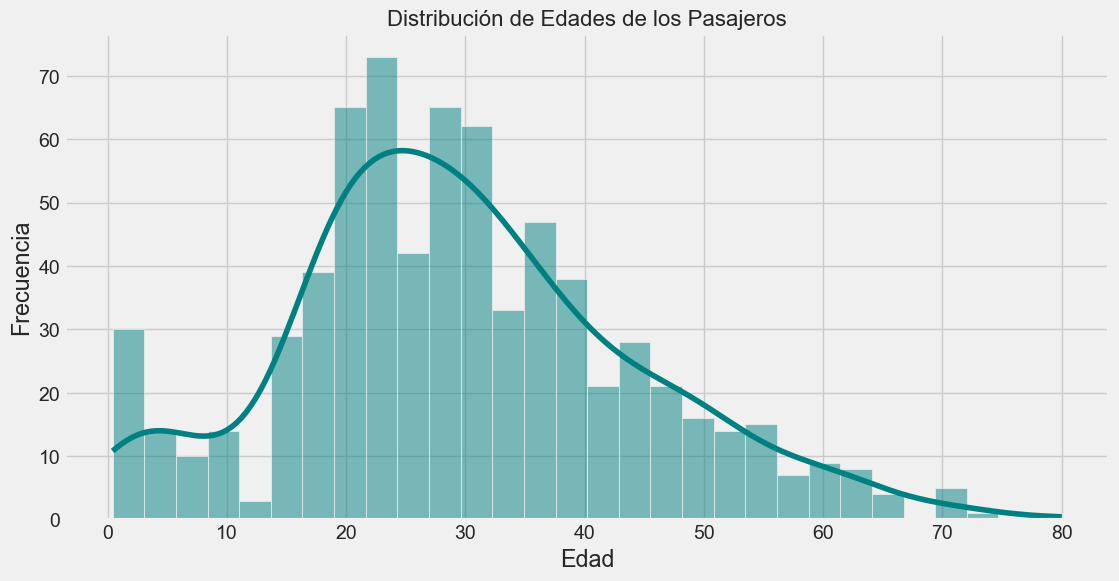

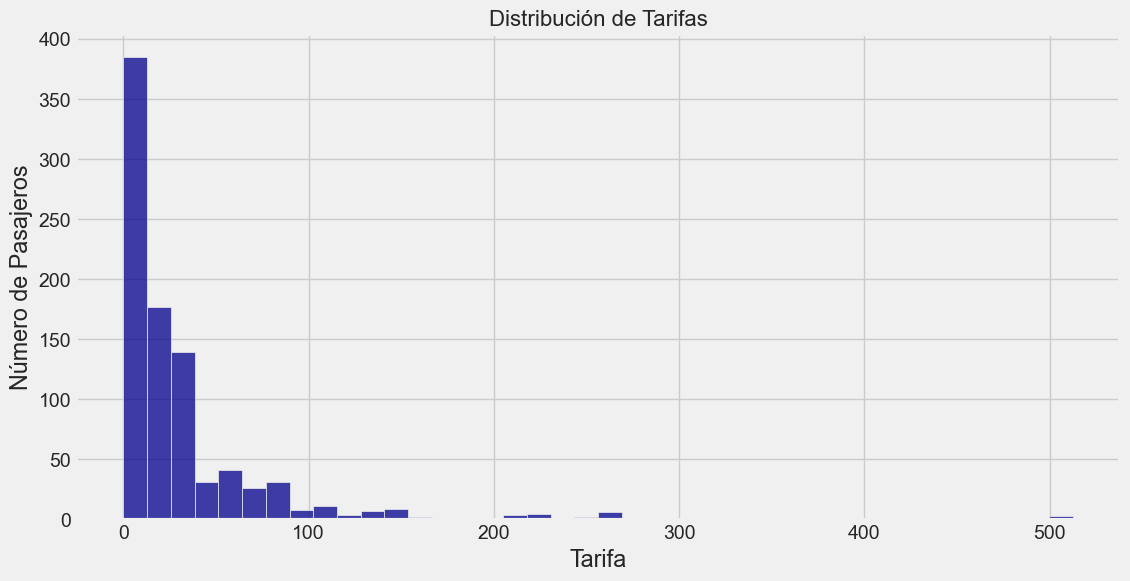


Error Cuadrático Medio del Modelo:
0.1355

Coeficiente de Determinación R^2 del Modelo:
0.4413

Precisión del Modelo (con predicciones binarias):
0.7877

Puntajes de Validación Cruzada (R^2):
[0.33519646 0.37449494 0.38024945 0.33702432 0.44944583]

Promedio de R^2 en Validación Cruzada:
0.3753


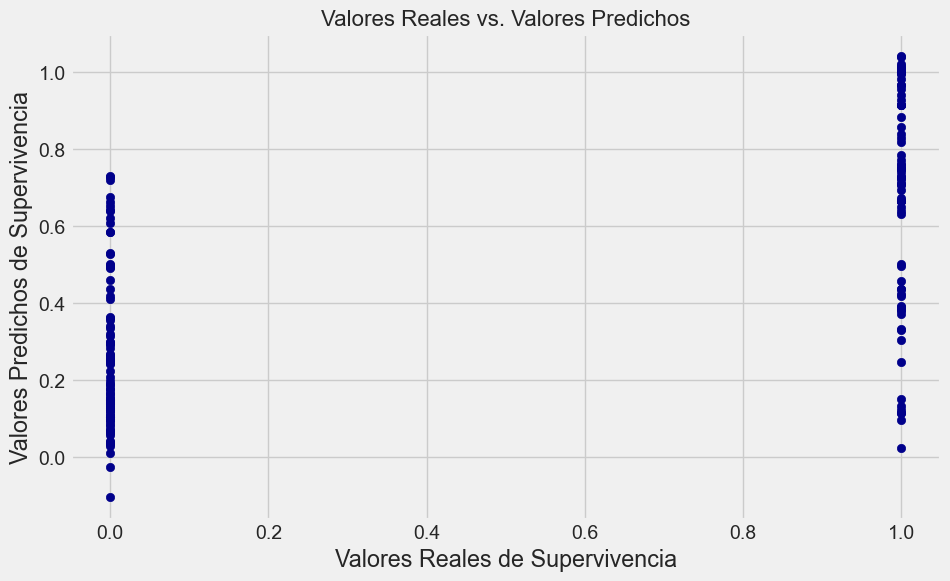

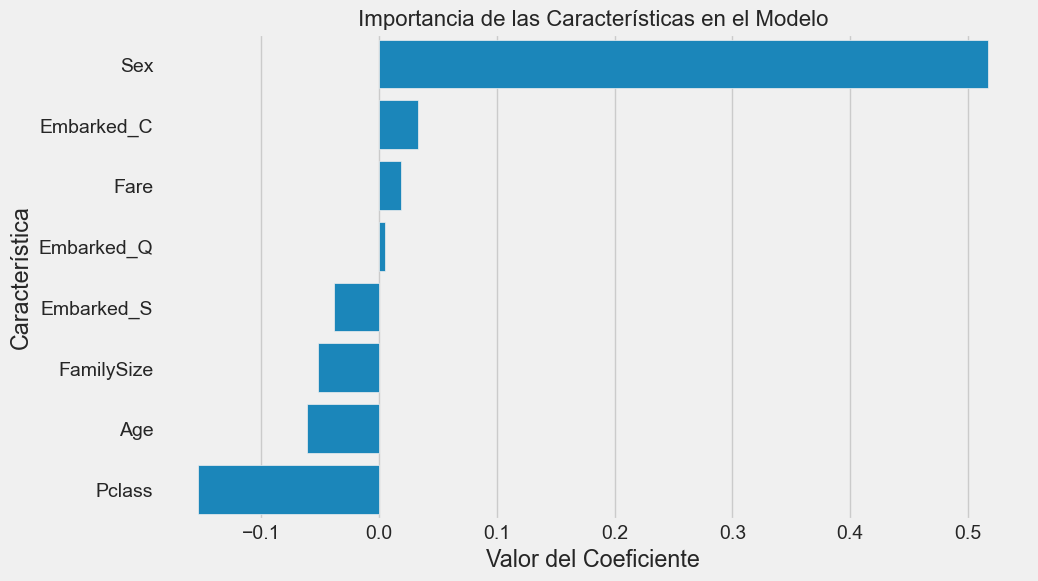

In [1]:
# Paso 0: Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

# Paso 1: Análisis Exploratorio de Datos
# En este paso se realiza un análisis exploratorio de los datos para comprender mejor su estructura y las relaciones entre las variables.
# Esto incluye la carga de los datos, la visualización de algunas estadísticas básicas y la identificación de patrones y relaciones significativas.

# Cargar el conjunto de datos
df = pd.read_csv('Titanic-Dataset.csv')

# Mostrar las primeras filas del conjunto de datos para tener una visión general
print("Primeras 5 filas del conjunto de datos:")
print(df.head())

# Obtener información general sobre el conjunto de datos, incluyendo el tipo de datos y el conteo de valores no nulos
print("\nInformación del DataFrame:")
print(df.info())

# Describir estadísticamente las columnas numéricas
print("\nEstadísticas descriptivas de las variables numéricas:")
print(df.describe())

# Contar valores nulos en cada columna
print("\nConteo de valores faltantes en cada columna:")
print(df.isnull().sum())

# Visualizar la distribución de edades para entender cómo se distribuye esta variable entre los pasajeros
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='teal')
plt.title('Distribución de Edades de los Pasajeros', fontsize=16)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la distribución de tarifas para identificar posibles valores atípicos o patrones en las tarifas pagadas
plt.figure(figsize=(12, 6))
sns.histplot(df['Fare'], bins=40, kde=False, color='darkblue')
plt.title('Distribución de Tarifas', fontsize=16)
plt.xlabel('Tarifa')
plt.ylabel('Número de Pasajeros')
plt.show()

# Paso 2: Preprocesamiento de los Datos
# En este paso, se realiza la limpieza y preparación de los datos para garantizar que el modelo pueda trabajar con ellos de manera efectiva.
# Esto incluye la imputación de valores faltantes y la transformación de variables categóricas en variables numéricas.

# Llenar los valores faltantes de 'Age' con la mediana para evitar el sesgo que podría causar la omisión de estas filas
df['Age'] = df['Age'].fillna(df['Age'].median())

# Llenar los valores faltantes de 'Embarked' con el modo, ya que este es el valor más frecuente y representativo
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Eliminar la columna 'Cabin' debido a que tiene demasiados valores faltantes y su utilidad para el modelo es limitada
df.drop('Cabin', axis=1, inplace=True)

# Crear una nueva característica 'FamilySize', que representa el tamaño de la familia del pasajero.
# Esta variable se considera relevante porque puede tener un impacto en la probabilidad de supervivencia
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Convertir variables categóricas en numéricas. 'Sex' es transformada en 0 para hombres y 1 para mujeres.
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Crear variables dummy para 'Embarked', lo cual ayuda al modelo a trabajar con las categorías de manera más efectiva
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)
df.drop('Embarked', axis=1, inplace=True)

# Paso 3: Selección de Características
# Aquí se seleccionan las características más relevantes que serán usadas por el modelo de Regresión Lineal.
# Las características seleccionadas son aquellas que tienen una relación directa con la supervivencia.

# Seleccionar las características y la variable objetivo
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize',
            'Embarked_C', 'Embarked_Q', 'Embarked_S']
X = df[features].copy()
y = df['Survived']

# Estandarizar las características numéricas para asegurar que todas estén en la misma escala, lo cual es importante para la regresión lineal
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(X[['Age', 'Fare', 'FamilySize']])

# Paso 4: División del Conjunto de Datos
# Dividir los datos en conjuntos de entrenamiento y prueba para evaluar correctamente el rendimiento del modelo.
# Utilizar una proporción de 80/20 para garantizar que el modelo pueda ser probado adecuadamente con datos no vistos.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Paso 5: Entrenamiento del Modelo
# En este paso se entrena el modelo de Regresión Lineal utilizando los datos de entrenamiento.
# A diferencia de la Regresión Logística, la Regresión Lineal se usa aquí para modelar la relación entre las características y la variable de supervivencia.

from sklearn.linear_model import LinearRegression

# Crear una instancia del modelo de Regresión Lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Paso 6: Evaluación del Desempeño del Modelo
# Evaluar el rendimiento del modelo en el conjunto de prueba usando métricas como el error cuadrático medio y el coeficiente de determinación R^2.

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Predecir los valores del conjunto de prueba
y_pred = model.predict(X_test)

# Convertir los valores predichos a 0 o 1 para calcular la precisión
y_pred_binario = [1 if val >= 0.5 else 0 for val in y_pred]

# Calcular y mostrar el error cuadrático medio y el coeficiente de determinación R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
precision = accuracy_score(y_test, y_pred_binario)

print('\nError Cuadrático Medio del Modelo:')
print(f"{mse:.4f}")

print('\nCoeficiente de Determinación R^2 del Modelo:')
print(f"{r2:.4f}")

print('\nPrecisión del Modelo (con predicciones binarias):')
print(f"{precision:.4f}")

# Paso 7: Validación Cruzada y Visualización de Resultados
# Añadir validación cruzada para mejorar la confiabilidad del modelo y realizar algunas visualizaciones para comprender mejor el rendimiento del modelo.

from sklearn.model_selection import cross_val_score

# Validación cruzada con 5 folds
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print('\nPuntajes de Validación Cruzada (R^2):')
print(cv_scores)
print('\nPromedio de R^2 en Validación Cruzada:')
print(f"{np.mean(cv_scores):.4f}")

# Graficar los valores predichos frente a los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='darkblue')
plt.title('Valores Reales vs. Valores Predichos', fontsize=16)
plt.xlabel('Valores Reales de Supervivencia')
plt.ylabel('Valores Predichos de Supervivencia')
plt.grid(True)
plt.show()

# Visualizar los coeficientes del modelo para entender qué características tuvieron mayor influencia
coefficients = pd.DataFrame({'Característica': X.columns, 'Coeficiente': model.coef_})
coefficients = coefficients.sort_values(by='Coeficiente', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficiente', y='Característica', data=coefficients)
plt.title('Importancia de las Características en el Modelo', fontsize=16)
plt.xlabel('Valor del Coeficiente')
plt.ylabel('Característica')
plt.show()

# Paso 8: Interpretar, analizar y documentar los resultados obtenidos
# Comentarios generales del código:
# - El modelo de Regresión Lineal se utilizó para aproximar la relación entre las características del pasajero y la probabilidad de supervivencia.
# - El coeficiente de determinación R^2 obtenido no es tan alto como podría esperarse, lo cual indica que la Regresión Lineal no es ideal para este tipo de problema donde la variable objetivo es binaria.
# - La Regresión Lineal no predice de manera precisa una variable binaria, ya que los valores de predicción pueden estar fuera del rango [0, 1]. Esto sugiere que la Regresión Logística sigue siendo una mejor opción para problemas de clasificación como este.
# - Para mejorar la confiabilidad del modelo, se añadió validación cruzada con 5 folds, lo cual proporciona una evaluación más robusta de su rendimiento.
# - La precisión del modelo, una vez convertidas las predicciones a valores binarios, alcanzó aproximadamente un 78%, lo cual sugiere que el modelo puede tener alguna utilidad, aunque no es óptimo para clasificación.
# - Los coeficientes del modelo proporcionan una idea de cómo cada característica afecta la predicción de la supervivencia, con el género y la clase siendo las características más influyentes.
